In [40]:
from config import *
import os
from merge import WaveObject
import numpy as np

In [41]:
from pydub import AudioSegment, effects
from pydub.playback import play

In [42]:
music1 = AudioSegment.from_file(str(test_data / "music1.wav"), format="wav") # 44.1 kHz 16 bit
music2 = AudioSegment.from_file(str(test_data / "music2.wav"), format="wav") # 44.1 kHz 16 bit
speech1 = AudioSegment.from_file(str(test_data / "voice1.wav"), format="wav") # 44.1 kHz 16 bit
speech2 = AudioSegment.from_file(str(test_data / "voice2.wav"), format="wav") # 44.1 kHz 16 bit

In [43]:
def get_median_dBFS(path):
    """Calculates the median dBFS value of all .wav files in the given directory."""
    dBFS_values = []
    for filename in path.iterdir():
        if filename.suffix != ".wav":
            continue
        audio = AudioSegment.from_file(str(path / filename), format="wav")
        dBFS_values.append(audio.dBFS)
    
    median = sorted(dBFS_values)[len(dBFS_values) // 2]
    return median

In [44]:
median_test_data = get_median_dBFS(test_data) # -21.55
median_test_data

-19.66155602783681

In [45]:
for filename in test_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

test1.wav: -17.77193040585984
music2.wav: -23.13888046938965
music3.wav: -21.553987442786596
music1.wav: -22.479710462412292
weird.wav: -4.779303057006685
voice2.wav: -19.66155602783681
voice3.wav: -22.913552927255097
voice1.wav: -18.733923010665663


In [46]:
def normalize_dBFS(path, target_dBFS, new_path):
    os.makedirs(new_path, exist_ok=True)
    """Normalizes all .wav files in the given directory to the target dBFS value."""
    for filename in path.iterdir():
        if filename.suffix != ".wav":
            continue
        audio = AudioSegment.from_file(str(path / filename), format="wav")
        audio = audio.apply_gain(target_dBFS - audio.dBFS)
        filename = filename.stem + "_normalized.wav"
        audio.export(str(new_path / filename), format="wav")

In [47]:
normalized_data = home / "sound-merge" / "tests" / "normalized_data"

In [48]:
normalize_dBFS(test_data, median_test_data, normalized_data)

In [49]:
print(f"median: {get_median_dBFS(normalized_data)}")
for filename in normalized_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

median: -19.66155602783681
weird_normalized.wav: -19.66155602783681
music2_normalized.wav: -19.66155602783681
music3_normalized.wav: -19.66155602783681
voice1_normalized.wav: -19.66155602783681
music1_normalized.wav: -19.66155602783681
voice3_normalized.wav: -19.66920767094335
test1_normalized.wav: -19.66155602783681
voice2_normalized.wav: -19.66155602783681


In [50]:
voice1_normalized = AudioSegment.from_file(str(normalized_data / "voice1_normalized.wav"), format="wav")

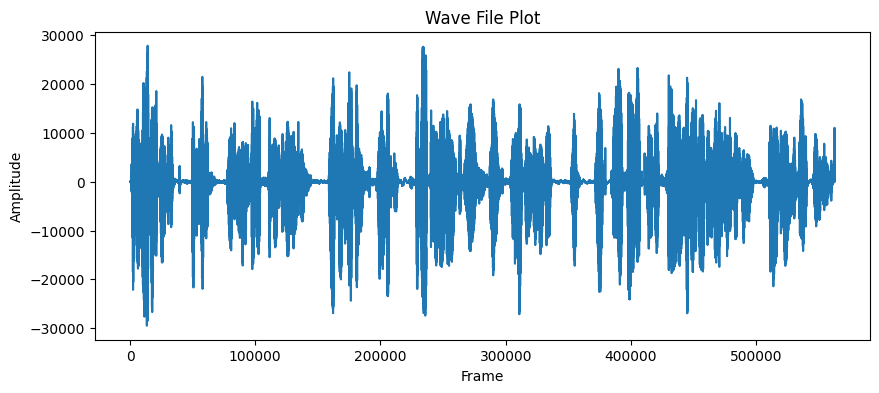

In [51]:
WaveObject.display_waveform_from_audiosegment(speech1)

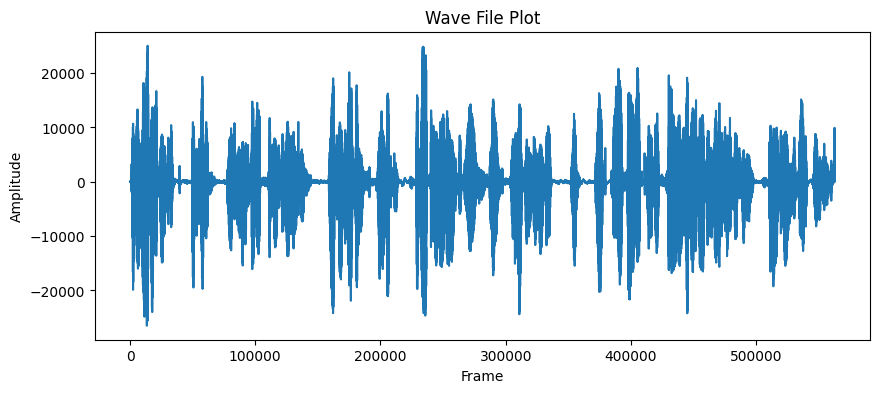

In [52]:
WaveObject.display_waveform_from_audiosegment(voice1_normalized)

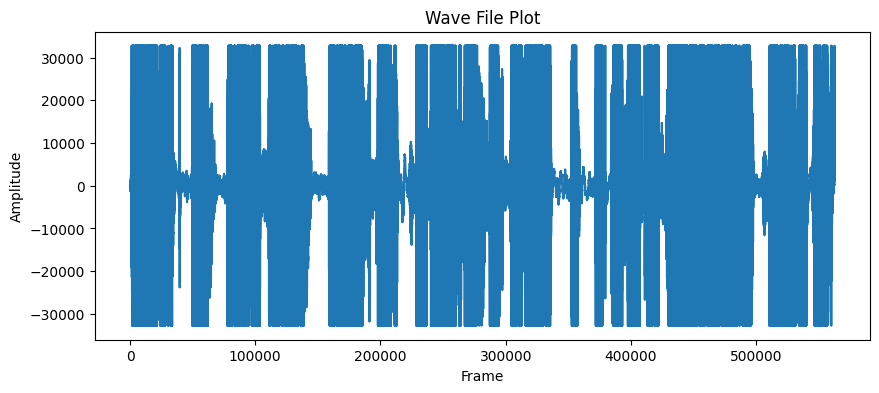

In [53]:
audio_ = speech1 + 20
WaveObject.display_waveform_from_audiosegment(audio_)

In [54]:
audio_.dBFS

-4.779303057006685

In [55]:
audio_.max_dBFS

0.0

In [56]:
audio_.export(test_data / "weird.wav", format="wav")

<_io.BufferedRandom name='/Users/glebmokeev/audio-projects/sound-merge/tests/data/weird.wav'>

In [57]:
for filename in test_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

test1.wav: -17.77193040585984
music2.wav: -23.13888046938965
music3.wav: -21.553987442786596
music1.wav: -22.479710462412292
weird.wav: -4.779303057006685
voice2.wav: -19.66155602783681
voice3.wav: -22.913552927255097
voice1.wav: -18.733923010665663


In [58]:
normalize_dBFS(test_data, get_median_dBFS(test_data), normalized_data)

In [59]:
audio__ = AudioSegment.from_file(str(normalized_data / "weird_normalized.wav"), format="wav")

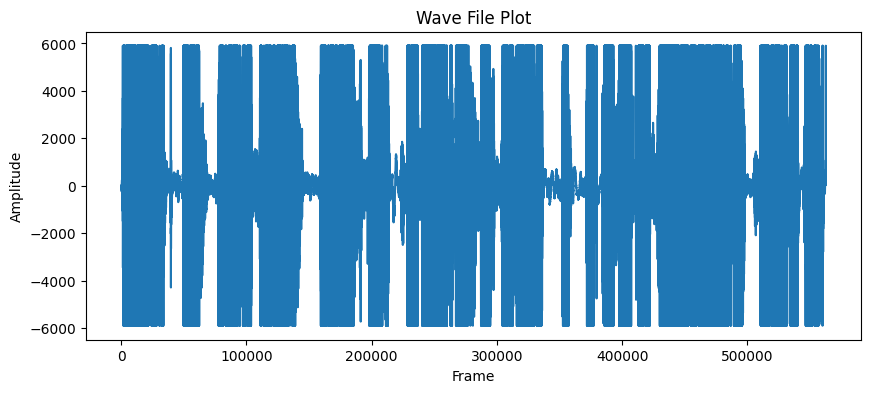

In [60]:
WaveObject.display_waveform_from_audiosegment(audio__)

In [61]:
print(f"median: {get_median_dBFS(normalized_data)}")
for filename in normalized_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

median: -19.66155602783681
weird_normalized.wav: -19.66155602783681
music2_normalized.wav: -19.66155602783681
music3_normalized.wav: -19.66155602783681
voice1_normalized.wav: -19.66155602783681
music1_normalized.wav: -19.66155602783681
voice3_normalized.wav: -19.66920767094335
test1_normalized.wav: -19.66155602783681
voice2_normalized.wav: -19.66155602783681


In [62]:
def normalize_headspace(path, new_path, headspace_dBFS):
    os.makedirs(new_path, exist_ok=True)
    """Normalizes all .wav files in the given directory given headspace."""
    for filename in path.iterdir():
        if filename.suffix != ".wav":
            continue
        audio = AudioSegment.from_file(str(path / filename), format="wav")
        audio = audio.normalize(headspace_dBFS)
        filename = filename.stem + "_normalized.wav"
        audio.export(str(new_path / filename), format="wav")

In [63]:
normalize_headspace(test_data, tests_path / "normalzied_headspace_data", 0.1)

In [64]:
_audio = AudioSegment.from_file(str(tests_path / "normalzied_headspace_data" / "voice1_normalized.wav"), format="wav")

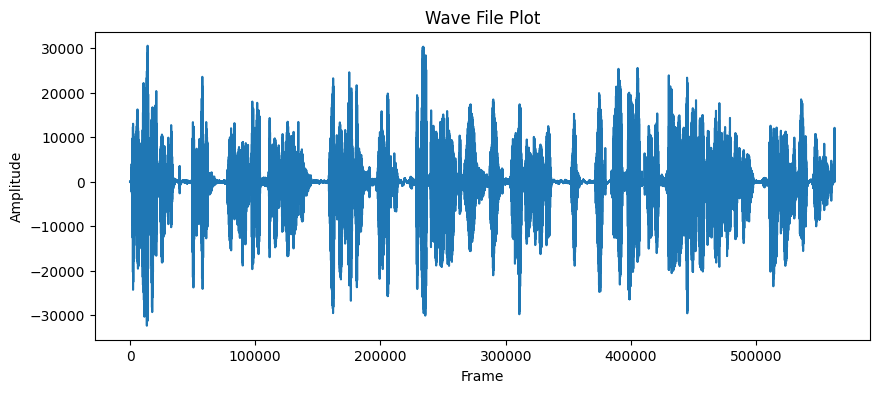

In [65]:
WaveObject.display_waveform_from_audiosegment(_audio)

In [66]:
head_norm_data = tests_path / "normalzied_headspace_data"

In [67]:
print(f"median: {get_median_dBFS(head_norm_data)}")
for filename in head_norm_data.iterdir():
    if filename.suffix != ".wav":
        continue
    audio = AudioSegment.from_file(str(filename), format="wav")
    print(f"{filename.name}: {audio.dBFS}")

median: -18.328813902727486
weird_normalized.wav: -4.879601526879456
music2_normalized.wav: -19.07028343291873
music3_normalized.wav: -21.652818598530992
voice1_normalized.wav: -17.918784282424383
music1_normalized.wav: -18.328813902727486
voice3_normalized.wav: -23.014227598086382
test1_normalized.wav: -15.416881190909582
voice2_normalized.wav: -18.84460215690592


In [68]:
import random

In [69]:
def random_silence_mask(audio_segment, total_silence_duration):
    total_silence_duration = min(total_silence_duration, len(audio_segment))

    silence_interval_duration = 1000 
    num_intervals = total_silence_duration // silence_interval_duration

    start_points = sorted(random.sample(range(0, len(audio_segment) - silence_interval_duration), num_intervals))
    modified_audio = audio_segment[:]

    for start in start_points:
        silence_segment = AudioSegment.silent(duration=silence_interval_duration)

        modified_audio = modified_audio[:start] + silence_segment + modified_audio[start + silence_interval_duration:]

    return modified_audio

In [70]:
au = random_silence_mask(speech1, 5000)

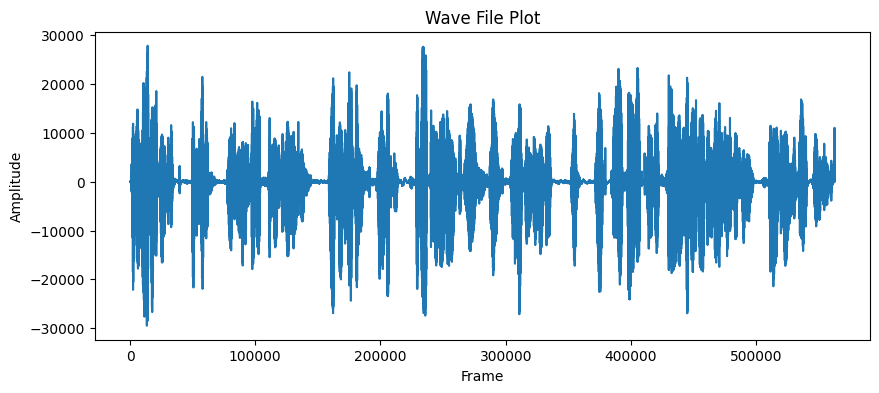

In [71]:
WaveObject.display_waveform_from_audiosegment(speech1)

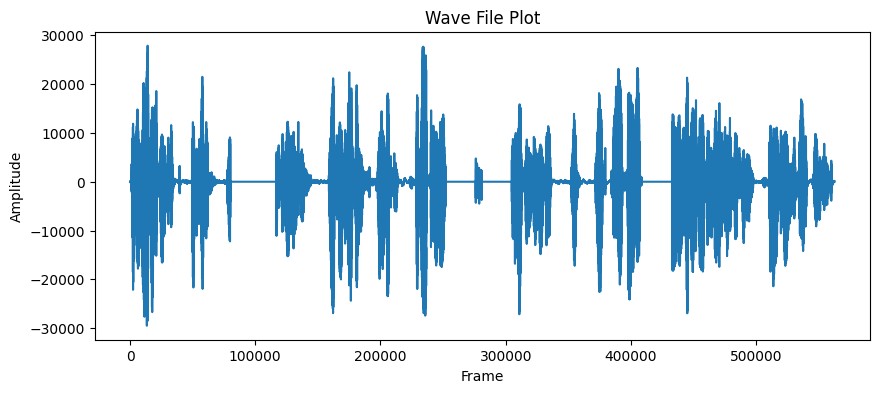

In [72]:
WaveObject.display_waveform_from_audiosegment(au)

In [73]:
test1 = AudioSegment.from_file(str(test_data / "test1.wav"), format="wav")

In [74]:
def concatenate(audio_segment1, audio_segment2, crossfade_duration=0):
    return audio_segment1.append(audio_segment2, crossfade=crossfade_duration)

In [75]:
au = concatenate(test1, speech1, 1000)

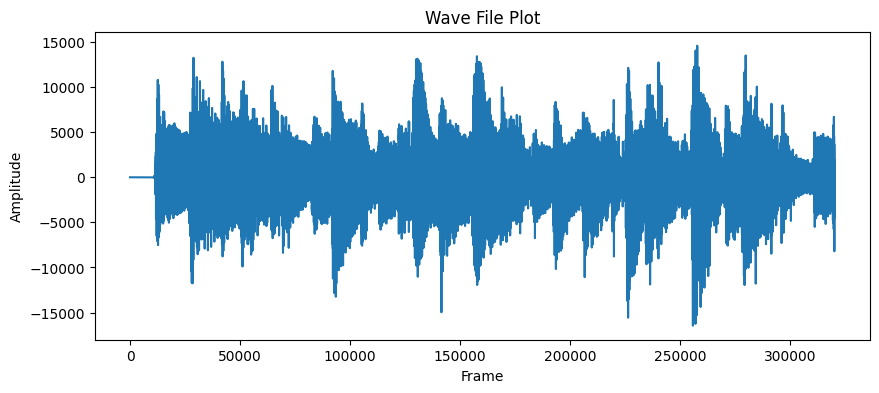

In [76]:
WaveObject.display_waveform_from_audiosegment(test1)

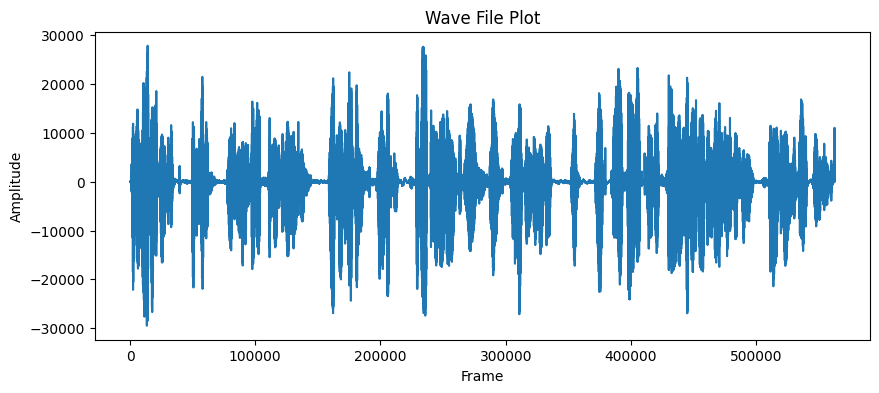

In [77]:
WaveObject.display_waveform_from_audiosegment(speech1)

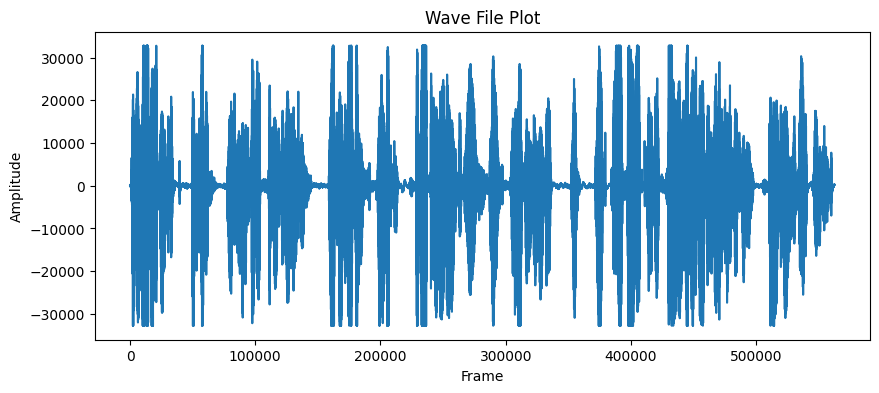

In [92]:
WaveObject.display_waveform_from_audiosegment(mixed)

In [93]:
play(mixed)

Input #0, wav, from '/var/folders/14/gktzbf5x5_18n56bjls0y7cw0000gn/T/tmp76f3cgyp.wav':
  Duration: 00:00:23.44, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s


KeyboardInterrupt: 

In [90]:
mixed = speech1.overlay(speech1, position=0)
print(f"test1 dBFS: {test1.dBFS}\n speech1 dBFS: {speech1.dBFS}\n mixed dBFS: {mixed.dBFS}")

test1 dBFS: -19.66155602783681
 speech1 dBFS: -19.66155602783681
 mixed dBFS: -13.728071962130704


In [82]:
def calculate_db_loss(percent):
    return -10 * np.log10(percent)

In [83]:
def mix(sc1, sc2, audio_segment1, audio_segment2):
    enh1 = audio_segment1 - calculate_db_loss(sc1)
    enh2 = audio_segment2 - calculate_db_loss(sc2)

    mixed_segment = enh1.overlay(enh2, position=0, loop=False)
    print(f"test1 dBFS: {enh1.dBFS}\n speech1 dBFS: {enh2.dBFS}\n mixed dBFS: {mixed_segment.dBFS}")
    return mixed_segment

In [87]:
mixed = mix(0.1, 0.9, test1, speech1)


test1 dBFS: -29.664684633234724
 speech1 dBFS: -20.11957165714339
 mixed dBFS: -20.00477261263832


In [85]:
normalize_dBFS(test_data, median_test_data, normalized_data)

In [88]:
speech1 = AudioSegment.from_file(str(normalized_data / "voice1_normalized.wav"), format="wav")
test1 = AudioSegment.from_file(str(normalized_data / "test1_normalized.wav"), format="wav")
print(f"test1 dBFS: {test1.dBFS}\n speech1 dBFS: {speech1.dBFS}")

test1 dBFS: -19.66155602783681
 speech1 dBFS: -19.66155602783681


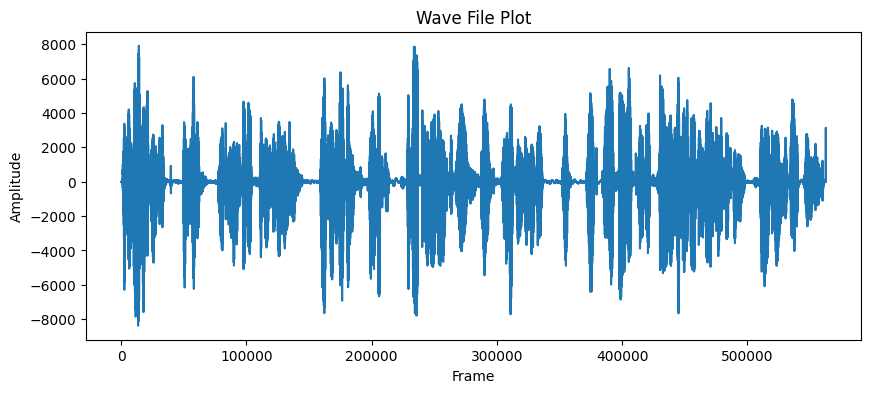

In [89]:
WaveObject.display_waveform_from_audiosegment(speech1 - calculate_db_loss(0.1))